### 학습 목표

1. 레이어 개념

2. 레이어 동작 방식

3. 레이어 설계 

4. Tensorflow 정의

#### 데이터 형태

- (m,n) 행렬 -> dataframe

- (C,W,H) -> Channel , Width, Height

- Channel : 이미지 데이터

# Layer

- 정의: 하나의 물체가 여러 개의 논리적인 객체로 구성.


## Linear  Layer

- 정의: 선형변환과 동일한 기능을 한다.

- 특징
   
    1.선형변환을 통해서 특정 차원으로 데이터 변환

   - 데이터가 풍부해지거나 집약시키는 효과가 있음.

    2.(a,b) and (a* b) 모두 같은 행렬이다.

    3.각각의 행렬들은 Weight
    
    4.Weight의 모든 요소는 Parameter
    
    5.Parameter의존 시 과적합이 일어난다.
    
    6.적합한 Weight찾기  <-- 훈련!!
    
    7.지역성 자체가 엄청 중요한 정보.
    
    -> 만약 삭제되었을 경우 입출력 사이의 관계 가중치를 찾아야한다.
    
- 꼴: (입력의 차원, 출력의 차원)

- bias(편향)

  - 정의: 선형변환된 값에 편향 파라미터를 더해주는 것이다.
  
- 목적: 데이터별로 맞는 Weight 선언하자!

In [2]:
## 데이터 집약시키는 코드

import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))     # Tensorflow는 Batch를 기반으로 동작하기에,
                                         # 우리는 사각형 2개 세트를 batch_size개만큼
                                         # 만든 후 처리를 하게 됩니다.
print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=1, use_bias=False) 
# units은 출력 차원 수를 의미합니다.


first_out = first_linear(boxes)
first_out = tf.squeeze(first_out, axis=-1) # (4, 1)을 (4,)로 변환해줍니다.
                                           # (불필요한 차원 축소)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4)
1단계 Linear Layer의 Weight 형태: (2, 1)

2단계 연산 준비: (64, 4)
2단계 연산 결과: (64,)
2단계 Linear Layer의 Weight 형태: (4, 1)


In [3]:
## 데이터 풍부

import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))

print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=3, use_bias=False)
first_out = first_linear(boxes)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

print("\n3단계 연산 준비:", second_out.shape)

third_linear = tf.keras.layers.Dense(units=1, use_bias=False)
third_out = third_linear(second_out)
third_out = tf.squeeze(third_out, axis=-1)

print("3단계 연산 결과:", third_out.shape)
print("3단계 Linear Layer의 Weight 형태:", third_linear.weights[0].shape)

total_params = \
first_linear.count_params() + \
second_linear.count_params() + \
third_linear.count_params()

print("총 Parameters:", total_params)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4, 3)
1단계 Linear Layer의 Weight 형태: (2, 3)

2단계 연산 준비: (64, 4, 3)
2단계 연산 결과: (64, 4)
2단계 Linear Layer의 Weight 형태: (3, 1)

3단계 연산 준비: (64, 4)
3단계 연산 결과: (64,)
3단계 Linear Layer의 Weight 형태: (4, 1)
총 Parameters: 13


## Convolution Layer

- Convolution이란?

  : 하나의 함수와 또 다른 함수를 곱한 후 그 구간에 대하여 적분하여 새로운 함수를 구하는 것.
  
  --> 필터와 이미지가 겹치는 부분에 Conv연산을 하면 새롭게 변형된 이미지를 얻을 수 있게 됩니다.
  
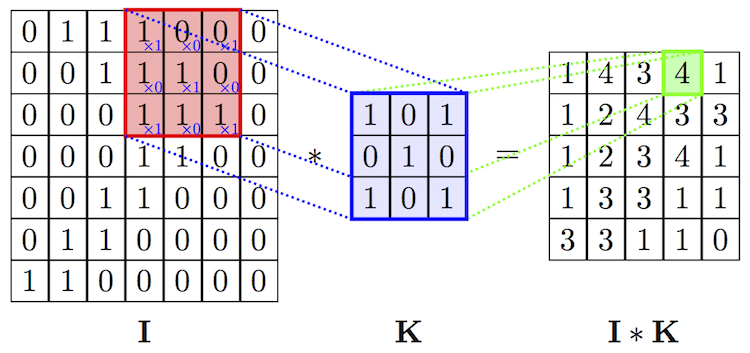  


- 효과

   1. image detection
   
   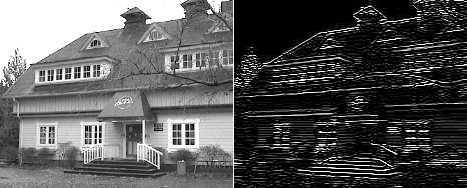
   
   2. Blur처리
   
     - Simple box
     
     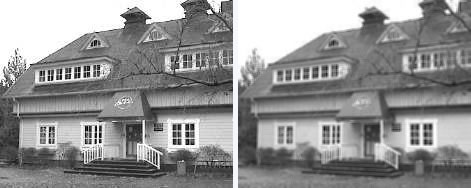
     
     - Gaussian
     
     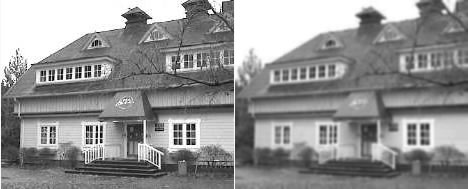
     
   3. Edge detection
   
   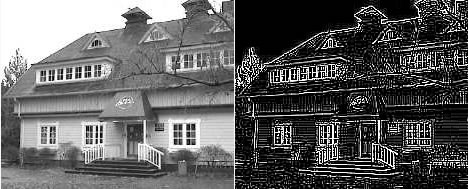
   
  
   4. The Sobel Edge Operator
   
   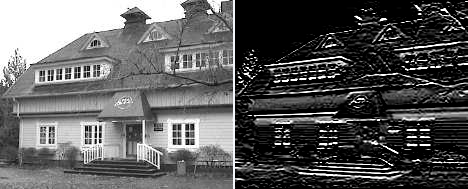
   
   5. The laplacian operator
   
   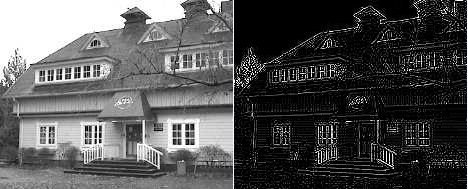
   
   6. The Laplacian of Gaussian
   
   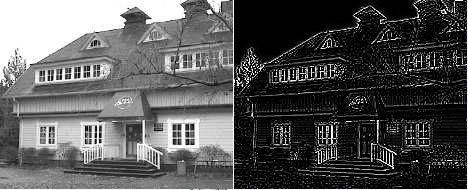
   


- Conv 연산

  : 입력의 형태를 변형시킨다.
  
- stride: 보폭

- padding쓰는 이유

  1. stride가 크거나 혹은 필터가 커서 제대로Convoluation연산이 되지 않게 되는 것을 방지함.
  
  2. 보통은 filter을 이용하면 input이미지가 작아지게 될 수밖에 없으나 zero-padding를 이용하면 이미지의 크기가 유지가 됩니다.
  
  3. Conv이후 아웃풋 이미지 크기 유지
  
  4. Edge쪽 픽셀정보 더 활용하기 위해서이다.
  
  
  
- 구성:[필터의 개수 * 필터의 가로 * 필터의 세로]로 이루어진 Weight.

- 특징

   1. 입력 정보를 집약 시킴(by 여러 개의 레이어 중첩)
   
   2. 최종 Linear가 작아져서 최적화가 가능함
   
   3. 지역성 정보가 온전히 보전히 되기에 인접한 픽셀들 사이의 패턴만 추출하면 불필요한 연산 제거 및 정확한 계산이 가능하다.
   
- 문제점

   1. 필터가 object detectino을 담기에 작을 수 있다
   
   2. stride사이즈로 인해서 파라미터는 줄어드나 object 필터 경계선에 걸려 인식을 못할 가능성도 있다.
   
   3. 극단적으로 필터사이즈와 이미지를 같게하면 Linear Layer가 된다. 그리고 그로 인해 연산량이 증가하여Accuracy 감소.

In [6]:
import tensorflow as tf

batch_size = 64
pic = tf.zeros((batch_size, 1920, 1080, 3))

print("입력 이미지 데이터:", pic.shape)
conv_layer = tf.keras.layers.Conv2D(filters=16,
                                    kernel_size=(5, 5),
                                    strides=5,
                                    use_bias=False)
conv_out = conv_layer(pic)

print("\nConvolution 결과:", conv_out.shape)
print("Convolution Layer의 Parameter 수:", conv_layer.count_params())

flatten_out = tf.keras.layers.Flatten()(conv_out)
print("\n1차원으로 펼친 데이터:", flatten_out.shape)

linear_layer = tf.keras.layers.Dense(units=1, use_bias=False)
linear_out = linear_layer(flatten_out)

print("\nLinear 결과:", linear_out.shape)
print("Linear Layer의 Parameter 수:", linear_layer.count_params())

ResourceExhaustedError: OOM when allocating tensor with shape[64,1920,1080,3] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Fill]

## Pooling Layer

### Receptive Field

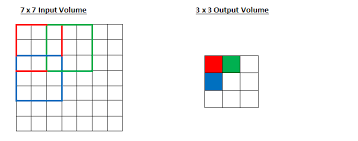

- Process: NN이 충분한 정보를 얻기 위해 커버하는 입력데이터의 수용영역으로 이 부분이 충분히 커야하고 입력 데이터 안에 object의 특성이 포함 되어야함

### MAX POOLING

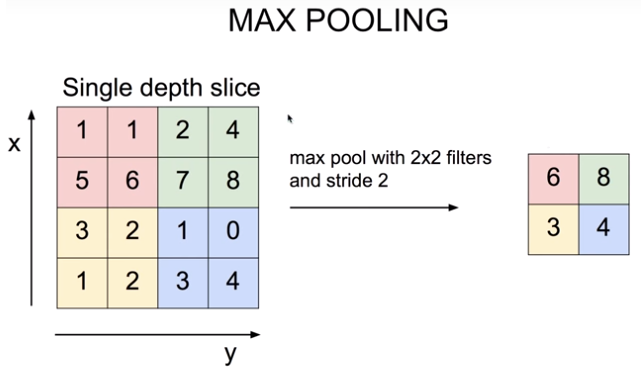

- 정의;효과적으로 Receptive Field를 키우고 그로 인해 정보 집약 효과가 극대화가 되고 필터 사이즈는 0입니다.

- 특징: 가장 큰 대표영역 뽑고 나머지는 무시합니다.

### 왜 MAX POOLING는 Accuracy 저하X

1. translational invariance효과

: 시프트 효과가 일어나도 동일한 특징을 안정적으로 잡아내어서 오버피팅 방지 및 안정적인 특징 추출 효과

2. 비선형 함수가 갖고 있는 추출 효과를 가짐

: 하위 레이어의 연산 결과는 무시하나 상위 레이어 추출하여 올려서 성능 증진.

3. Receptive Field 극대화.

: 레이어를 많이 쌓으면 오버피팅, 연상량 증가, 기울기 손실등의 문제가 발생하지만 그것을 해결함.


## Deconvolution Layer


### Auto Encoder

- 정의: Convolution결과를 역재생하여 원본 복원

- 만드는 순서

1. import 패키지  and load MNIST Dataset

2. Auto Encoder Model 구성

3. 모델 훈련

4. 모델 복원 TEST


In [7]:
## 이미지 복원을 할 것이기 때문에 y_train, y_test를 사용하지 않고
## x_train의 라벨이 x_train자신이 된다.

import numpy as np
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.datasets import mnist
import json
import matplotlib.pyplot as plt #for plotting

# MNIST 데이터 로딩
(x_train, _), (x_test, _) = mnist.load_data()    # y_train, y_test는 사용하지 않습니다.

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [8]:
# 모델 구성

# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')
encode_pool_layer_1 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
encode_pool_layer_2 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu', padding='same')
encode_pool_layer_3 = MaxPooling2D((2, 2), padding='same')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)
encoded = encode_pool_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분
# Conv2D: shape를 변화시키지 않는다.
## MaxPooling2D만 output Shape변화
decode_conv_layer_1 = Conv2D(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2D(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

# upsampling2d를 거쳐서 최종 출력 28 * 28 사이즈가 나온다
#upsampling2d를 거친다
decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 4)           292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 4)           0     

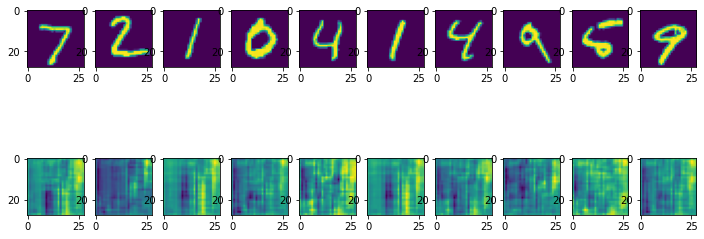

In [9]:

##  이미지 생성

x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])

In [10]:
from tensorflow.python.keras.layers import Conv2DTranspose

# Conv2DTranspose를 활용한  AutoEncoder 모델
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu')
encode_pool_layer_1 = MaxPooling2D((2, 2))
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu')
encode_pool_layer_2 = MaxPooling2D((2, 2))
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분  - 
decode_conv_layer_1 = Conv2DTranspose(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2DTranspose(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 4)           292       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 3, 3, 4)           148 